In [72]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

rcParams['figure.figsize'] = 12,10

import warnings
warnings.filterwarnings("ignore")

In [73]:
# Converting the angle into Radian for Sin modulation
x = np.array([i *np.pi / 180 for i in range(60,300,4)]) 
x

array([1.04719755, 1.11701072, 1.18682389, 1.25663706, 1.32645023,
       1.3962634 , 1.46607657, 1.53588974, 1.60570291, 1.67551608,
       1.74532925, 1.81514242, 1.88495559, 1.95476876, 2.02458193,
       2.0943951 , 2.16420827, 2.23402144, 2.30383461, 2.37364778,
       2.44346095, 2.51327412, 2.58308729, 2.65290046, 2.72271363,
       2.7925268 , 2.86233997, 2.93215314, 3.00196631, 3.07177948,
       3.14159265, 3.21140582, 3.28121899, 3.35103216, 3.42084533,
       3.4906585 , 3.56047167, 3.63028484, 3.70009801, 3.76991118,
       3.83972435, 3.90953752, 3.97935069, 4.04916386, 4.11897703,
       4.1887902 , 4.25860337, 4.32841654, 4.39822972, 4.46804289,
       4.53785606, 4.60766923, 4.6774824 , 4.74729557, 4.81710874,
       4.88692191, 4.95673508, 5.02654825, 5.09636142, 5.16617459])

In [74]:
#help(np.random.normal)

In [75]:
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
y

array([ 1.06576338,  1.00608589,  0.69537381,  0.94979894,  1.06349612,
        0.87679492,  1.03434863,  1.01567311,  1.00003454,  0.96833186,
        1.04976168,  1.15075133,  0.80629667,  1.08142497,  0.93308857,
        0.93279605,  0.65854724,  0.80828129,  0.96582538,  0.53268764,
        0.34612837,  0.32627941,  0.56982979,  0.82721666,  0.57529033,
        0.59291348,  0.29050974,  0.41761115,  0.0984859 ,  0.1617371 ,
       -0.04009758, -0.15215283, -0.11926686, -0.27933299, -0.07936639,
       -0.31276815, -0.34670514, -0.52011641, -0.34144842, -0.69758068,
       -0.54375288, -0.74728915, -0.88405983, -0.86141134, -0.94972624,
       -0.89793005, -0.94966508, -0.88035836, -0.86628362, -0.99240876,
       -0.98869355, -0.95115776, -1.08037269, -0.89316682, -0.86818818,
       -0.95427063, -0.61109018, -0.81343768, -0.94402473, -0.95312111])

In [76]:
data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
data.head()

,x,y
0,1,1.1
1,1.1,1
2,1.2,0.7
3,1.3,0.95
4,1.3,1.1


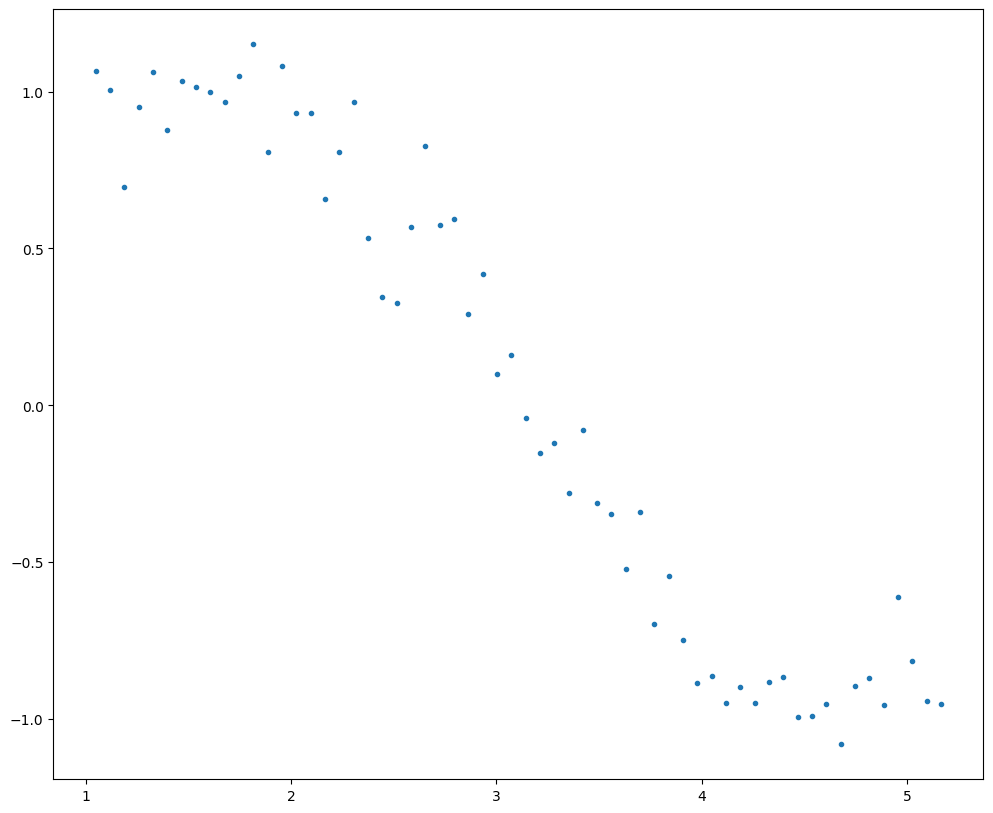

In [77]:
plt.plot(data['x'],data['y'],'.')

In [78]:
# designing the dataset in multiple degree polynomial
for i in range(2,16):
    colname = 'x_%d' % i
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1,1.1,1.1,1.1,1.2,1.3,1.3,1.4,1.4,1.5,1.6,1.7,1.7,1.8,1.9,2
1,1.1,1,1.2,1.4,1.6,1.7,1.9,2.2,2.4,2.7,3,3.4,3.8,4.2,4.7,5.3
2,1.2,0.7,1.4,1.7,2,2.4,2.8,3.3,3.9,4.7,5.5,6.6,7.8,9.3,11,13
3,1.3,0.95,1.6,2,2.5,3.1,3.9,4.9,6.2,7.8,9.8,12,16,19,24,31
4,1.3,1.1,1.8,2.3,3.1,4.1,5.4,7.2,9.6,13,17,22,30,39,52,69


In [79]:
def linear_regression(data,power,models_to_plot):
    
    # initialie the predictors
    predictors = ['x']

    if power >= 2:
        predictors.extend(['x_%d' %i for i in range(2,power+1)])
    
    # Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    # Check if a plot if to be made for entered power
    # searching power in key of models_to_plot dictionary

    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.') #plot gnerating a line kind of plot
        #plt.scatter(data['x'],data['y'])
        plt.title('Plot for Power: %d' %power)
        
    # Regression : Measure of error Return the result in pre-defined format
    rss =  sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [80]:
# Initialize a data frame to store the results
col = ['rss','intercept'] + ['coef_x_%d' % i for i in range(1,16)]
ind = ['model_pow_%d' % i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind,columns=col)
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Define the powers for which a plot is required
models_to_plot = { 1:231, 3:232,6:233,9:234,12:235,15:236}

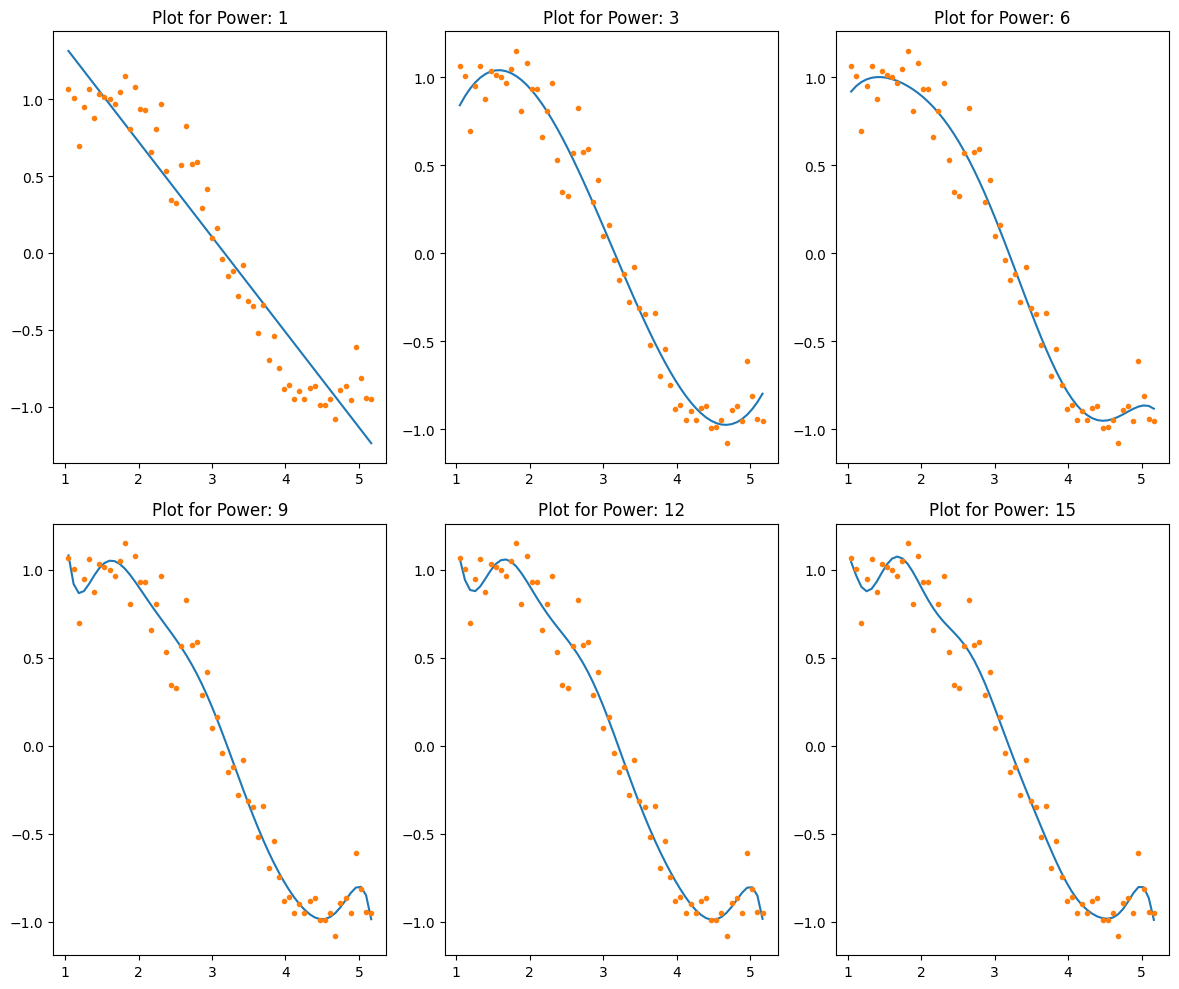

In [82]:
# Iterate through all powers and simulate resutls
for i in range(1,16): 
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data,power=i,models_to_plot=models_to_plot)

In [118]:
pd.options.display.float_format = '{:0.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


In [119]:
#import sklearn
#help(sklearn.linear_model.Ridge)

In [130]:
def ridge_regression(data, predictors, alpha, models_to_plot = {}):
        
    # Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    # Check if a plot if to be made for entered power
    # searching power in key of models_to_plot dictionary

    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.') #plot gnerating a line kind of plot
        #plt.scatter(data['x'],data['y'])
        plt.title('Plot for alpha: %.3g' %alpha)
        
    # Regression : Measure of error Return the result in pre-defined format
    rss =  sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [131]:
# initialie the predictors
predictors = ['x']
predictors.extend(['x_%d' %i for i in range(2,16)])
predictors

['x',
 'x_2',
 'x_3',
 'x_4',
 'x_5',
 'x_6',
 'x_7',
 'x_8',
 'x_9',
 'x_10',
 'x_11',
 'x_12',
 'x_13',
 'x_14',
 'x_15']

In [132]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

In [133]:
# Initialize a data frame to store the results
col = ['rss','intercept'] + ['coef_x_%d' % i for i in range(1,16)]
ind = ['alpha_%-2g' % alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind,columns=col)
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# Define the powers for which a plot is required
models_to_plot = { 1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

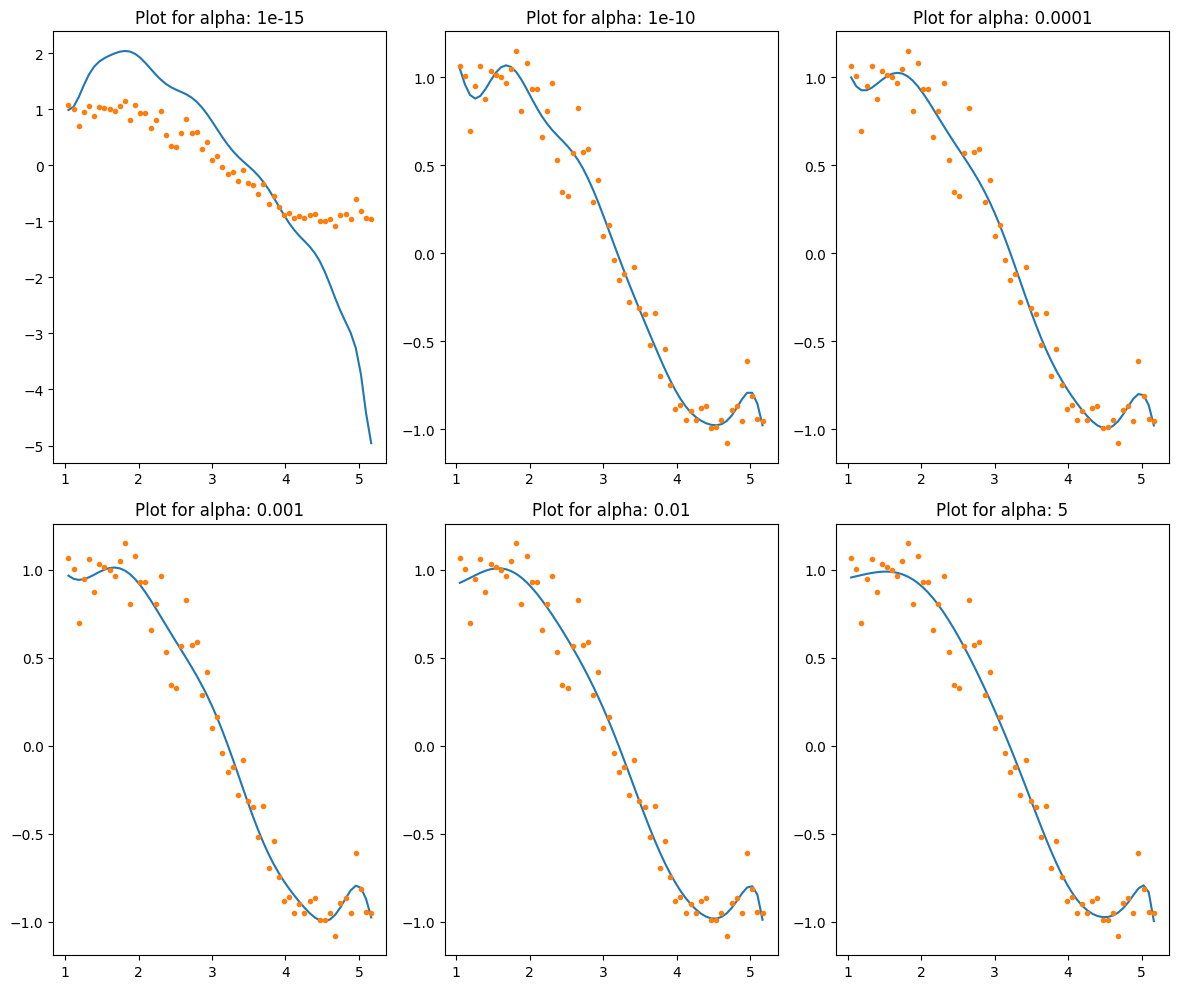

In [136]:
# Iterate through all powers and simulate resutls
for i in range(10):
    #print(ridge_regression(data,predictors,alpha_ridge[i],models_to_plot))
    coef_matrix_ridge.iloc[i,] = ridge_regression(data,predictors,alpha_ridge[i],models_to_plot)

-     The RSS increases with an increase in alpha.
-     An alpha value as small as 1e-15 gives us a significant reduction in the magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of the simple linear regression table.
-     High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1Though the coefficients are really small, they are NOT zero.

In [137]:
pd.options.display.float_format = '{:0.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,80,-2.8e+04,1.9e+05,-5.9e+05,1.1e+06,-1.4e+06,1.3e+06,-8.4e+05,4.2e+05,-1.6e+05,4.6e+04,-1e+04,1.6e+03,-1.9e+02,15,-0.71,0.016
alpha_1e-10,0.85,75,-6.5e+02,2e+03,-2.8e+03,1.1e+03,2e+03,-3.8e+03,3.3e+03,-1.8e+03,6.9e+02,-1.9e+02,36,-4.8,0.43,-0.023,0.00055
alpha_1e-08,0.87,-5.8,65,-1.1e+02,-9.5,1.3e+02,-49,-1.2e+02,1.8e+02,-1.2e+02,49,-13,2.5,-0.32,0.026,-0.0013,2.6e-05
alpha_0.0001,0.89,6.3,-5.9,-3.3,2.2,4,0.019,-3.6,-0.14,3.4,-2.8,1.1,-0.28,0.044,-0.0042,0.00022,-5e-06
alpha_0.001,0.91,2.5,-1.4,-1.1,0.095,0.93,0.58,-0.45,-0.61,0.32,0.31,-0.36,0.16,-0.038,0.0053,-0.00041,1.4e-05
alpha_0.01,0.93,1.1,-0.27,-0.2,0.083,0.29,0.15,-0.22,-0.24,0.32,-0.12,-0.0016,0.014,-0.0049,0.00079,-6.5e-05,2.2e-06
alpha_1,0.94,0.87,0.0074,0.018,0.027,0.027,0.012,-0.011,-0.021,-0.0019,0.017,-0.009,0.0013,0.00024,-0.00011,1.5e-05,-6.8e-07
alpha_5,0.95,0.92,0.0035,0.0082,0.013,0.014,0.0096,0.00011,-0.0087,-0.0074,0.004,0.0053,-0.005,0.0018,-0.00034,3.3e-05,-1.3e-06
alpha_10,0.95,0.93,0.0026,0.006,0.0092,0.011,0.0079,0.001,-0.0065,-0.0068,0.0024,0.0056,-0.0047,0.0017,-0.0003,2.9e-05,-1.1e-06
alpha_20,0.95,0.95,0.0017,0.004,0.0063,0.0075,0.0062,0.0015,-0.0043,-0.0059,0.00053,0.006,-0.0045,0.0015,-0.00027,2.5e-05,-9.7e-07


In [140]:
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


In [141]:
coef_matrix_ridge.apply(lambda x :sum(x.values==0),axis = 1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

In [143]:
#import sklearn
#help(sklearn.linear_model.Lasso)

In [190]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):

    # Fit the model
    lassoreg = Lasso(alpha=alpha,max_iter=1000000)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    # Check if a plot if to be made for entered power
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g' %alpha)
        
    # Return the result in pre-defined format
    rss =  sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [191]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [192]:
# Initialize a data frame to store the results
col = ['rss','intercept'] + ['coef_x_%d' % i for i in range(1,16)]
ind = ['alpha_%-2g' % alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind,columns=col)
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
#Define the powers for which a plot is required
models_to_plot = { 1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

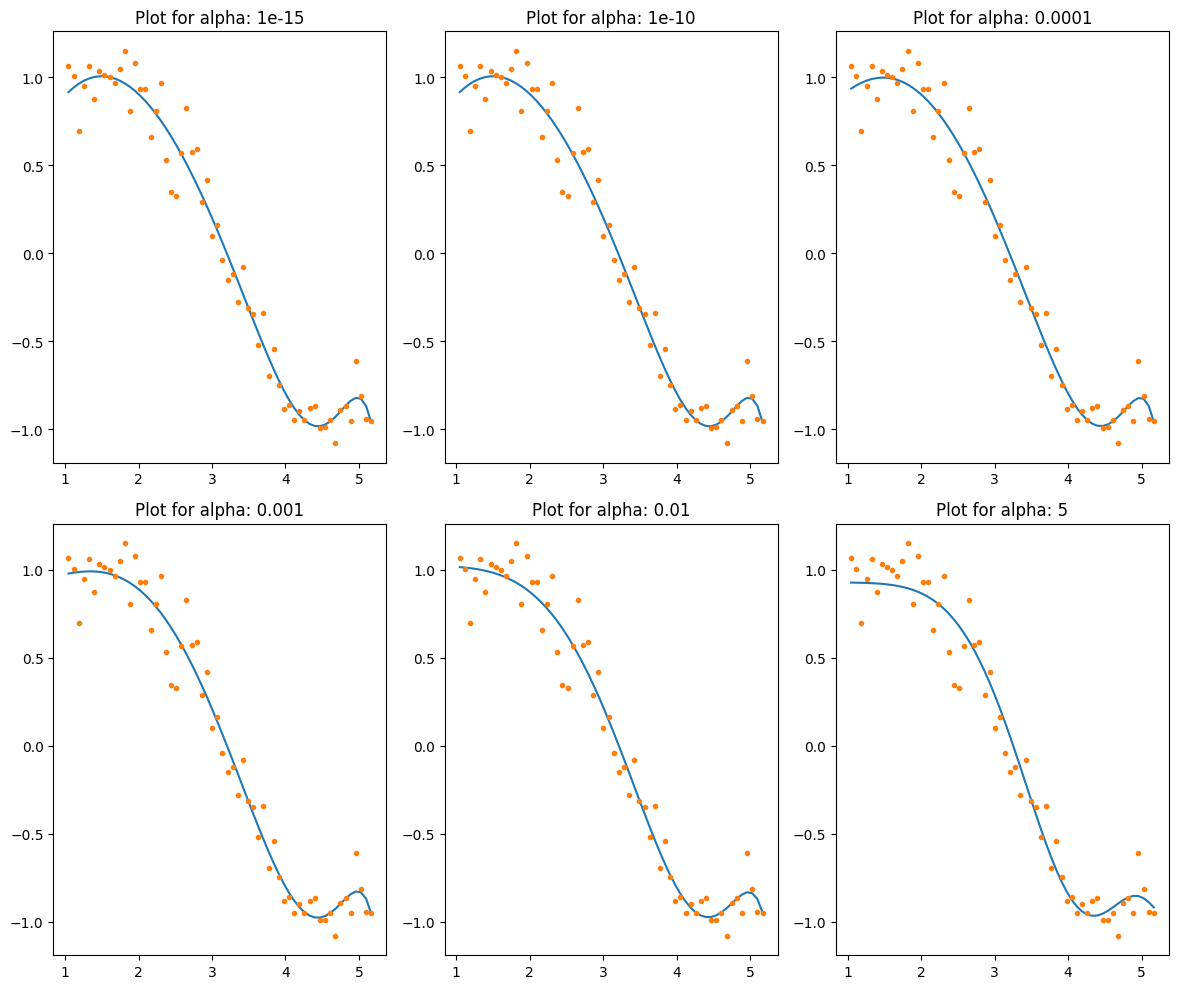

In [194]:
# Iterate through all powers and simulate resutls
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [196]:
pd.options.display.float_format = '{:0.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.95,-0.033,1.4,-0.46,-0.027,0.01,0.0011,-0.00011,-5.2e-05,-7.5e-06,-9.8e-08,2.6e-07,8.6e-08,1.7e-08,2e-09,-1.8e-10,-2e-10
alpha_1e-10,0.95,-0.033,1.4,-0.46,-0.027,0.01,0.0011,-0.00011,-5.2e-05,-7.5e-06,-9.8e-08,2.6e-07,8.6e-08,1.7e-08,2e-09,-1.8e-10,-2e-10
alpha_1e-08,0.95,-0.033,1.4,-0.46,-0.027,0.01,0.0011,-0.00011,-5.2e-05,-7.5e-06,-9.9e-08,2.6e-07,8.6e-08,1.7e-08,2e-09,-1.8e-10,-2e-10
alpha_1e-05,0.95,0.097,1.1,-0.28,-0.076,0.013,0.0017,-0.0001,-5.9e-05,-9.1e-06,-2.7e-07,2.6e-07,8.9e-08,1.8e-08,2.1e-09,-1.7e-10,-2.1e-10
alpha_0.0001,0.95,0.48,0.46,0.13,-0.16,0.0063,0.0045,6.5e-05,-7.8e-05,-1.5e-05,-1.1e-06,2.2e-07,1e-07,2.2e-08,2.8e-09,-1.4e-10,-2.3e-10
alpha_0.001,0.96,0.9,0,0.1,0,-0.036,0.0021,0.0013,3.8e-06,-2e-05,-3.3e-06,-1.4e-07,7.1e-08,2.4e-08,3.8e-09,3.6e-11,-2.3e-10
alpha_0.01,0.99,1,0,0,0,-0,-0.0058,-2.4e-07,0.0003,5.2e-06,-2.8e-06,-5e-07,-1.9e-08,1e-08,2.7e-09,1.6e-10,-1.5e-10
alpha_1,1,0.96,-0,-0,-0,-0,-0,-0.00081,-0.0006,0.00013,2.7e-05,-1.2e-06,-5.4e-07,-6.9e-08,-3.6e-09,7.3e-10,2.5e-10
alpha_5,1.1,0.93,-0,-0,-0,-0,-0,-0,-0.00057,-7.2e-05,5.4e-05,3.9e-06,-6.6e-07,-1.7e-07,-1.9e-08,2.4e-10,7.5e-10
alpha_10,1.3,0.9,-0,-0,-0,-0,-0,-0,-7.1e-05,-0.00028,5.1e-05,1.2e-05,-5.5e-07,-2.6e-07,-3.5e-08,-7.5e-10,1.2e-09


In [197]:
coef_matrix_lasso.apply(lambda x :sum(x.values==0),axis = 1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     0
alpha_0.0001    0
alpha_0.001     2
alpha_0.01      4
alpha_1         5
alpha_5         6
alpha_10        6
dtype: int64